In [1]:
from __future__ import print_function, division
%matplotlib inline


import os

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError: 
        from imp import reload  # Python 3.0 - 3.3

In [2]:
import numpy as np
import modisco
import theano
print("Theano version:",theano.__version__)
import sys
print (sys.version)
import h5py

Using cuDNN version 7001 on context None
Mapped name None to device cuda0: GeForce GTX TITAN X (0000:08:00.0)


Theano version: 1.0.2
2.7.15 |Anaconda, Inc.| (default, May  1 2018, 23:32:55) 
[GCC 7.2.0]


1 task:
HepG2-JUND-human-ENCSR000EEI-optimal_idr.narrowPeak.gz

![laplace_b](figures/laplace_0.png)
[logs](logs/modisco.log)

added mu to the laplace model

Metaclusters heatmap


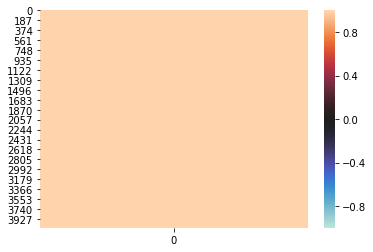

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 2479
Task 7 hypothetical scores:


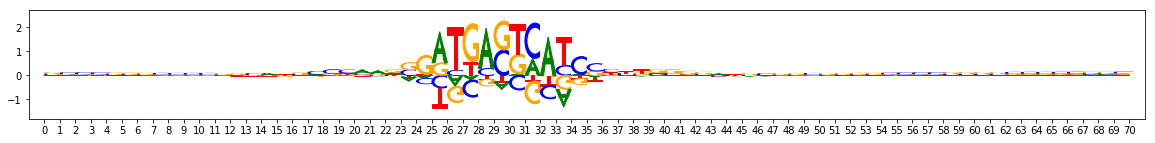

Task 7 actual importance scores:


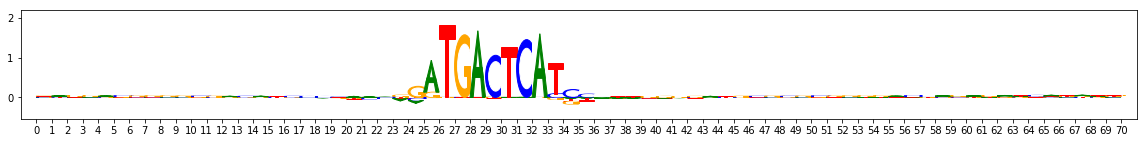

onehot, fwd and rev:


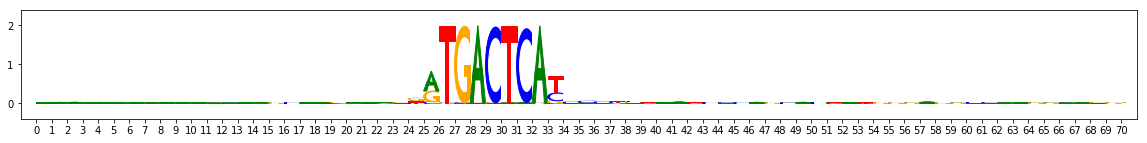

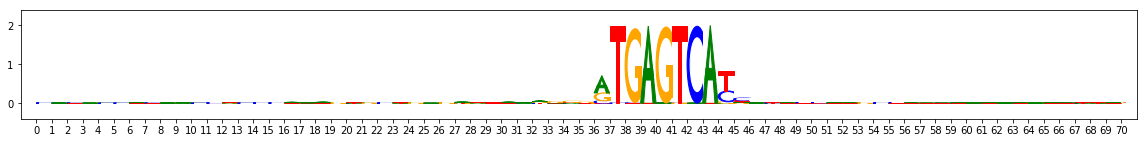

metacluster_0 pattern_1
total seqlets: 1024
Task 7 hypothetical scores:


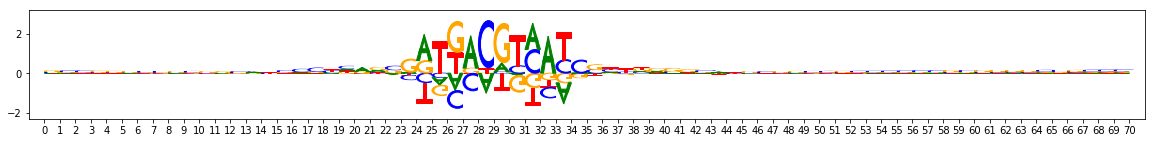

Task 7 actual importance scores:


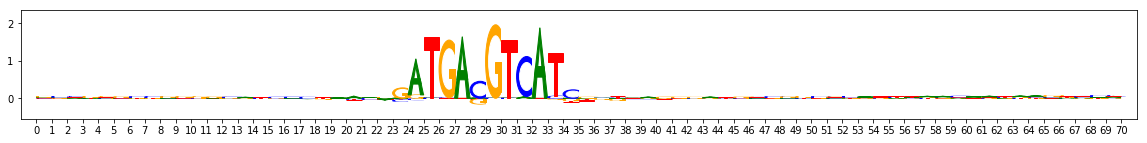

onehot, fwd and rev:


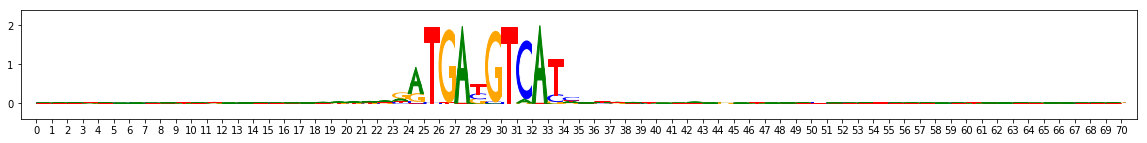

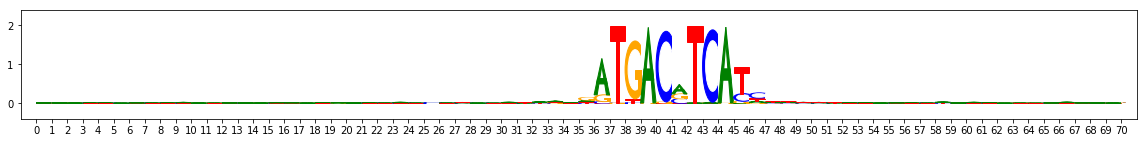

metacluster_0 pattern_2
total seqlets: 215
Task 7 hypothetical scores:


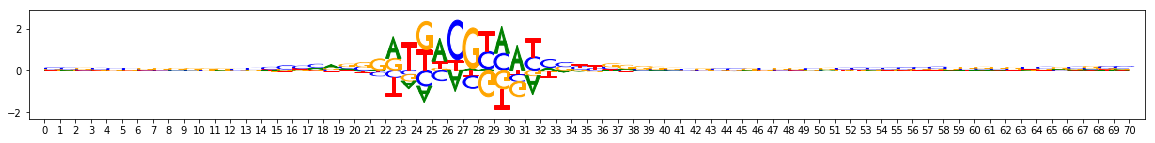

Task 7 actual importance scores:


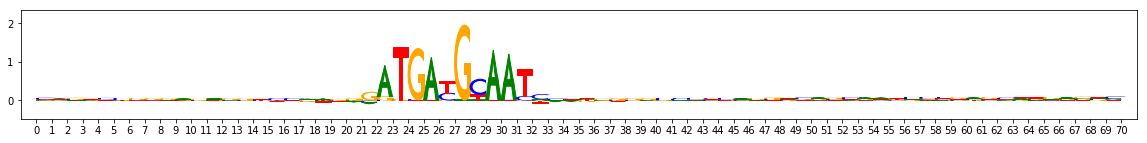

onehot, fwd and rev:


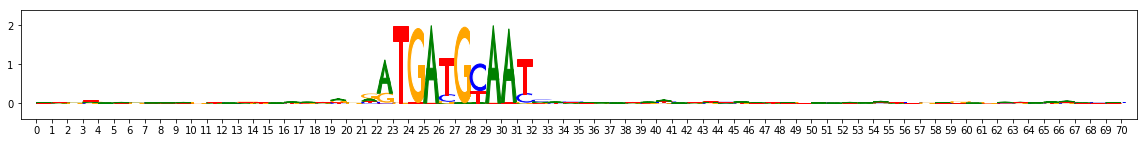

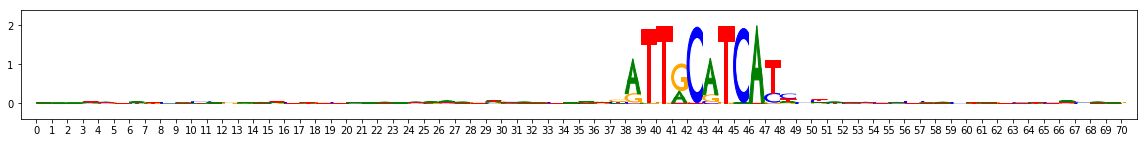

metacluster_0 pattern_3
total seqlets: 45
Task 7 hypothetical scores:


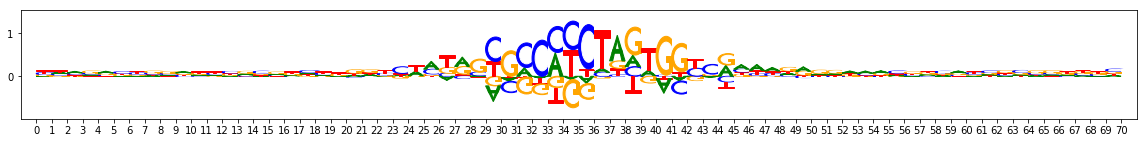

Task 7 actual importance scores:


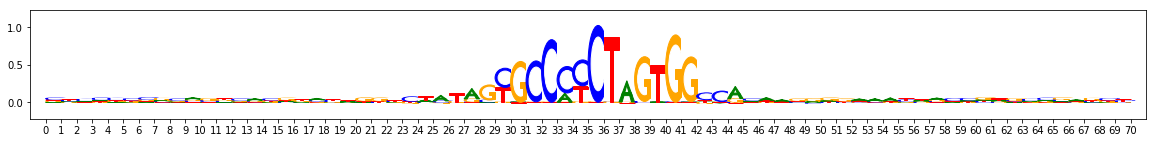

onehot, fwd and rev:


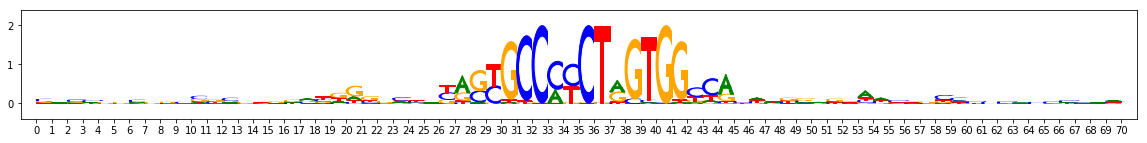

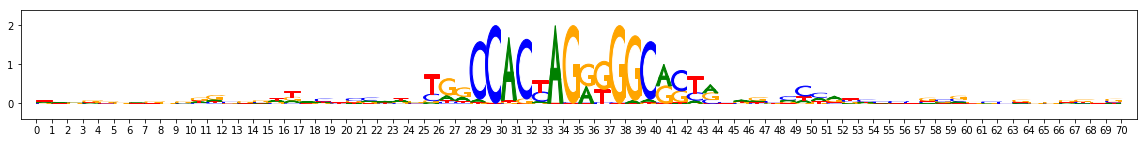

metacluster_0 pattern_4
total seqlets: 36
Task 7 hypothetical scores:


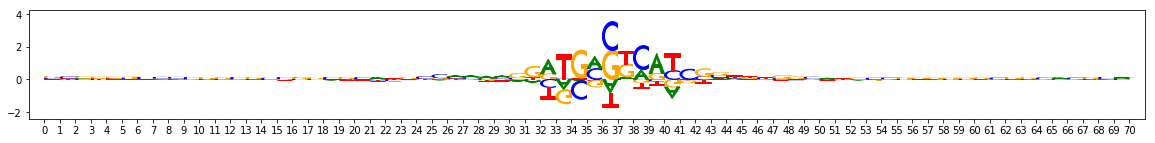

Task 7 actual importance scores:


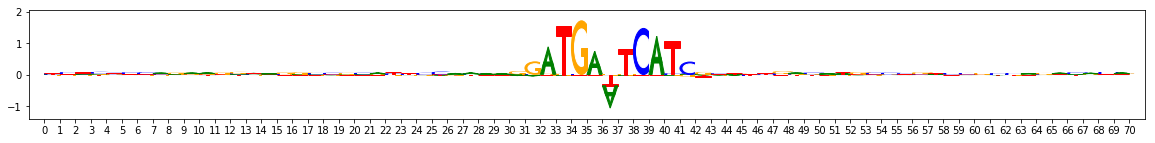

onehot, fwd and rev:


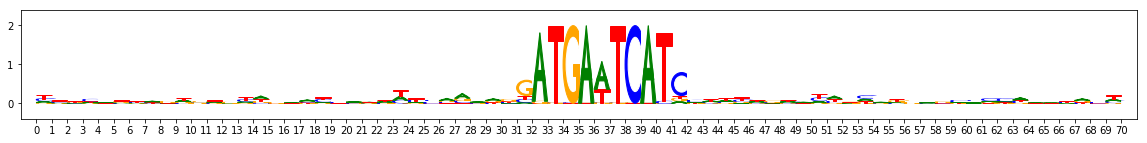

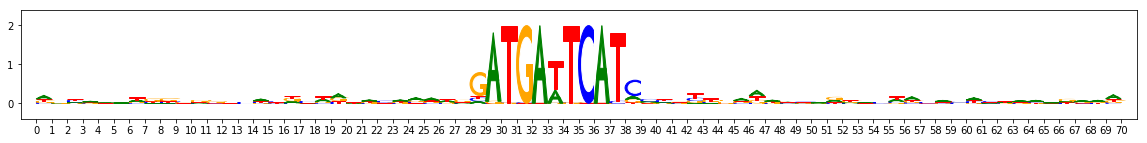

In [3]:
from collections import Counter
from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

hdf5_results = h5py.File("results.hdf5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        background = np.array([0.27, 0.23, 0.23, 0.27])
        print("Task 7 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task7_hypothetical_contribs"]["fwd"])
        print("Task 7 actual importance scores:")
        viz_sequence.plot_weights(pattern["task7_contrib_scores"]["fwd"])

        
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        
hdf5_results.close()

modisco log

```
2018-08-04 01:37:57 INFO  /home/ktian/kundajelab/tfnet/scripts/run_tfmodisco.py scores/hyp_scores_task_ subset_nobg.fa subset_nobg.tsv 7 8
2018-08-04 01:37:57 DEBUG $HOME=/home/ktian
2018-08-04 01:37:57 DEBUG matplotlib data path /home/ktian/anaconda3/envs/modisco_dev/lib/python2.7/site-packages/matplotlib/mpl-data
2018-08-04 01:37:57 DEBUG loaded rc file /home/ktian/anaconda3/envs/modisco_dev/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
2018-08-04 01:37:57 DEBUG matplotlib version 2.2.2
2018-08-04 01:37:57 DEBUG interactive is False
2018-08-04 01:37:57 DEBUG platform is linux2
Using cuDNN version 7001 on context None
Mapped name None to device cuda0: GeForce GTX TITAN X (0000:08:00.0)
2018-08-04 01:38:01 DEBUG Theano version:1.0.2
2018-08-04 01:38:01 DEBUG 2.7.15 |Anaconda, Inc.| (default, May  1 2018, 23:32:55) 
[GCC 7.2.0]
2018-08-04 01:38:01 DEBUG method file prefix is scores/hyp_scores_task_, input seq file is subset_nobg.fa, input tsv is subset_nobg.tsv, start_task is 7 end_task is 8
2018-08-04 01:38:01 DEBUG lenth of sequences = 146825
2018-08-04 01:38:07 DEBUG merged overlaps based on in_tsv subset_nobg.tsv, 146825 seqs merged into 14211 seqs, max len 3042
2018-08-04 01:38:09 DEBUG shape of hyp_score (540, 4)
2018-08-04 01:38:09 DEBUG shape of score (540, 4)
On task task7
Computing windowed sums
Computing threshold
2018-08-04 01:38:28 DEBUG CACHEDIR=/home/ktian/.cache/matplotlib
2018-08-04 01:38:28 DEBUG Using fontManager instance from /home/ktian/.cache/matplotlib/fontList.json
2018-08-04 01:38:28 DEBUG backend agg version v2.2
2018-08-04 01:38:29 DEBUG findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/home/ktian/anaconda3/envs/tfenv/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with 
score of 0.050000
peak(mu)= 0.43488584977976275
Mu: 4.348858e-01 +/- 1.325084e-05
Lablace_b: 0.32495731113268134 and 0.9086305207387446
Thresholds: -2.7433501114137453 and 8.780291460853983
#fdrs pass: 0 and 64858
CDFs: 0.9999434549131933 and 0.9998973922920736
Est. FDRs: 1.0 and 0.009999386761308978
saving plot to figures/laplace_0.png
Got 4094 coords
After resolving overlaps, got 4094 seqlets
Across all tasks, the weakest laplace threshold used was: 0.9998973922920736
4094 identified in total
1 activity patterns with support >= 100 out of 3 possible patterns
Metacluster sizes:  [4093]
Idx to activities:  {0: '1'}
On metacluster 0
Metacluster size 4093
Relevant tasks:  ('task7',)
Relevant signs:  (1,)
(Round 1) num seqlets: 4093
(Round 1) Computing coarse affmat
Beginning embedding computation
Computing embeddings
Finished embedding computation in 3.98 s
Starting affinity matrix computations
Normalization computed in 1.12 s
Cosine similarity mat computed in 2.56 s
Normalization computed in 1.23 s
Cosine similarity mat computed in 2.72 s
Finished affinity matrix computations in 5.41 s
(Round 1) Compute nearest neighbors from coarse affmat
Computed nearest neighbors in 0.44 s
(Round 1) Computing affinity matrix on nearest neighbors
Launching nearest neighbors affmat calculation job
Job completed in: 59.37 s
Launching nearest neighbors affmat calculation job
Job completed in: 61.48 s
(Round 1) Computed affinity matrix on nearest neighbors in 127.9 s
Filtered down to 3854 of 4093
(Round 1) Retained 3854 rows out of 4093 after filtering
(Round 1) Computing density adapted affmat
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3854 samples in 0.010s...
[t-SNE] Computed neighbors for 3854 samples in 0.116s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3854
[t-SNE] Computed conditional probabilities for sample 2000 / 3854
[t-SNE] Computed conditional probabilities for sample 3000 / 3854
[t-SNE] Computed conditional probabilities for sample 3854 / 3854
[t-SNE] Mean sigma: 0.161569
(Round 1) Computing clustering
Beginning preprocessing + Louvain
Wrote graph to binary file in 0.192629098892 seconds
Running Louvain modularity optimization
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    4.6s
[Parallel(n_jobs=20)]: Done 200 out of 200 | elapsed:    5.5s finished
Louvain completed 200 runs in 17.4710800648 seconds
Wrote graph to binary file in 1.81811690331 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.856175
Louvain completed 51 runs in 19.4221131802 seconds
Preproc + Louvain took 39.7440190315 s
Got 14 clusters after round 1
Counts:
{0: 565, 1: 487, 2: 452, 3: 425, 4: 399, 5: 299, 6: 278, 7: 269, 8: 258, 9: 151, 10: 118, 11: 68, 12: 49, 13: 36}
(Round 1) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 565 seqlets
Trimmed 0 out of 565
Aggregating for cluster 1 with 487 seqlets
Trimmed 0 out of 487
Aggregating for cluster 2 with 452 seqlets
Trimmed 6 out of 452
Aggregating for cluster 3 with 425 seqlets
Trimmed 7 out of 425
Aggregating for cluster 4 with 399 seqlets
Trimmed 6 out of 399
Aggregating for cluster 5 with 299 seqlets
Trimmed 0 out of 299
Aggregating for cluster 6 with 278 seqlets
Trimmed 12 out of 278
Aggregating for cluster 7 with 269 seqlets
Trimmed 1 out of 269
Aggregating for cluster 8 with 258 seqlets
Trimmed 7 out of 258
Aggregating for cluster 9 with 151 seqlets
Trimmed 2 out of 151
Aggregating for cluster 10 with 118 seqlets
Trimmed 4 out of 118
Aggregating for cluster 11 with 68 seqlets
Trimmed 2 out of 68
Aggregating for cluster 12 with 49 seqlets
Trimmed 4 out of 49
Aggregating for cluster 13 with 36 seqlets
Trimmed 0 out of 36
Got 14 clusters
Splitting into subclusters...
Inspecting for spurious merging
Wrote graph to binary file in 0.36260509491 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00410146
Louvain completed 21 runs in 6.72661495209 seconds
Similarity is 0.9797362715578686; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.337431192398 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00643823
Louvain completed 21 runs in 6.18100118637 seconds
Similarity is 0.9570423463169065; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.265930891037 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00357676
After 2 runs, maximum modularity is Q = 0.00357702
Louvain completed 22 runs in 6.8199429512 seconds
Similarity is 0.9844733357132288; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.254617929459 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00568213
Louvain completed 21 runs in 6.31634306908 seconds
Similarity is 0.9623870099386284; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.237982988358 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00397414
After 2 runs, maximum modularity is Q = 0.00400437
After 5 runs, maximum modularity is Q = 0.00400473
After 16 runs, maximum modularity is Q = 0.00400474
Louvain completed 36 runs in 11.0081601143 seconds
Similarity is 0.9777787207093807; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.116422176361 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00460456
Louvain completed 21 runs in 6.16247391701 seconds
Similarity is 0.9770750477043463; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.0960159301758 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00559579
After 21 runs, maximum modularity is Q = 0.0055958
Louvain completed 41 runs in 11.8000919819 seconds
Similarity is 0.9851480885141954; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.095428943634 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00620518
After 2 runs, maximum modularity is Q = 0.00656102
After 8 runs, maximum modularity is Q = 0.00671092
After 9 runs, maximum modularity is Q = 0.00671093
Louvain completed 29 runs in 9.08023810387 seconds
Similarity is 0.9547001903486723; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.0837121009827 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.002953
After 2 runs, maximum modularity is Q = 0.00313742
After 5 runs, maximum modularity is Q = 0.00314575
After 20 runs, maximum modularity is Q = 0.0031539
Louvain completed 40 runs in 11.914358139 seconds
Similarity is 0.9761695128501899; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.035786151886 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00643819
After 8 runs, maximum modularity is Q = 0.00643976
Louvain completed 28 runs in 8.03996801376 seconds
Similarity is 0.9412115222965294; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.0241878032684 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00224198
After 2 runs, maximum modularity is Q = 0.00242772
After 5 runs, maximum modularity is Q = 0.00243626
Louvain completed 25 runs in 7.71979498863 seconds
Similarity is 0.9382448952538487; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.0122268199921 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00125712
After 2 runs, maximum modularity is Q = 0.00127658
After 8 runs, maximum modularity is Q = 0.00130321
Louvain completed 28 runs in 8.18628382683 seconds
Similarity is 0.9831176349303987; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.00715613365173 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00402451
After 2 runs, maximum modularity is Q = 0.0049517
Louvain completed 22 runs in 6.51344203949 seconds
Similarity is 0.9202575779055799; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.00359201431274 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00833719
After 9 runs, maximum modularity is Q = 0.0083372
Louvain completed 29 runs in 8.5103290081 seconds
Similarity is 0.8855295129619006; is_dissimilar is False
Merging on 14 clusters
On merging iteration 1
Computing pattern to seqlet distances
Computing pattern to pattern distances
Collapsing 4 & 8 with prob 0.0006460416820995536 and sim 0.986898771981947
Collapsing 0 & 2 with prob 0.00019044340406164866 and sim 0.9840717746754295
Collapsing 1 & 6 with prob 1.371988592851396e-05 and sim 0.9817830922018795
Collapsing 3 & 5 with prob 6.089849760084063e-06 and sim 0.9750595385883187
Collapsing 4 & 10 with prob 2.3123879397029665e-05 and sim 0.973356129788674
Collapsing 8 & 10 with prob 0.0001651568321500341 and sim 0.965615241512045
Collapsing 2 & 5 with prob 0.0003872942794537811 and sim 0.9579786246950601
Collapsing 0 & 6 with prob 0.00020048664959909797 and sim 0.9575442867696078
Collapsing 0 & 3 with prob 0.0002053673165100071 and sim 0.9440875476892892
Collapsing 9 & 11 with prob 5.5141197984901325e-06 and sim 0.9418905973831964
Collapsing 1 & 3 with prob 9.007188058115704e-06 and sim 0.9363218839535088
Collapsing 0 & 1 with prob 2.243565165606468e-05 and sim 0.9349585548960145
Collapsing 0 & 5 with prob 1.1119846328928073e-06 and sim 0.932203019810818
Collapsing 2 & 6 with prob 2.8660223420935274e-06 and sim 0.9320972278096745
Collapsing 1 & 2 with prob 0.00018602039139361713 and sim 0.9317588884297288
Collapsing 3 & 6 with prob 8.145462532432113e-05 and sim 0.9257243522215671
Collapsing 5 & 6 with prob 4.335653452115015e-06 and sim 0.918240255677461
Collapsing 1 & 5 with prob 3.287843836139054e-05 and sim 0.9129084103700827
Collapsing 7 & 8 with prob 0.00028158693363657843 and sim 0.8863382043520676
Collapsing 7 & 10 with prob 4.159686467079479e-05 and sim 0.8790028756969626
Collapsing 4 & 7 with prob 0.00043205489701526634 and sim 0.8715150181444232
Trimmed 2 out of 644
Trimmed 0 out of 1011
Trimmed 0 out of 753
Trimmed 0 out of 717
Trimmed 0 out of 756
Trimmed 2 out of 1728
Trimmed 0 out of 2479
Trimmed 0 out of 215
Trimmed 0 out of 1024
On merging iteration 2
Computing pattern to seqlet distances
Computing pattern to pattern distances
Got 5 patterns after merging
Performing seqlet reassignment
Got 5 patterns after reassignment
Total time taken is 350.34s
2018-08-04 01:44:25 DEBUG **************** workflow done *********************
2018-08-04 01:44:25 DEBUG **************** result saved *********************
```